<a href="https://colab.research.google.com/github/cdiegor/MineracaoDeDados/blob/main/Exerc%C3%ADcios_de_Minera%C3%A7%C3%A3o_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Custo de seguro saúde

### Contexto

Prever corretamente os custos para um paciente em um seguro de saúde é uma forma de realizar cobranças mais justas e mesmo de prever os futuros negócios da empresa.

### Conteúdo



O seguinte dicionário de dados pode ser usado para melhor entendimento dos atributos.

|Variável |Definição|
|--- |---|
|age| Idade do beneficiário principal|
|sex| Sexo do contratante de seguro feminino, masculino|
|bmi| Índice de massa corporal|
|children| Número de filhos cobertos pelo seguro de saúde / Número de dependentes|
|smoker| Se o contratante é fumante|
|region| A área residencial do beneficiário nos EUA, nordeste, sudeste, sudoeste, noroeste|
|charges| Custos médicos individuais cobrados pelo seguro de saúde|

In [256]:
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt

In [257]:
data = pd.read_csv(r'dataset/insurance.csv',sep=',')
data.head(4)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061


&nbsp;

# Analise de dados

In [258]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [259]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


[]

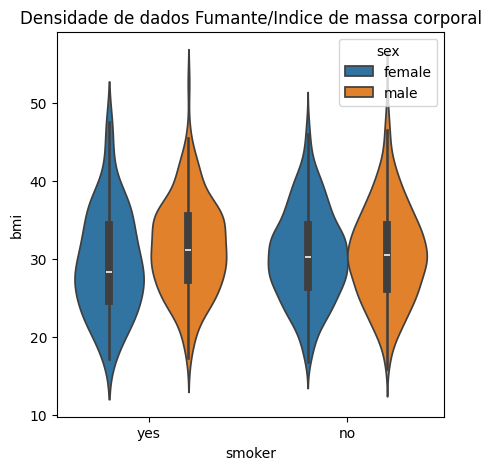

In [260]:
plt.figure(figsize=(5,5))
sea.violinplot( x = data['smoker'] ,y = data['bmi']  ,hue=data['sex'])
plt.title('Densidade de dados Fumante/Indice de massa corporal')
plt.plot()

In [261]:
data.groupby(by='region')['charges'].mean().reset_index().sort_index()

,region,charges
0,northeast,13406.384516
1,northwest,12417.575374
2,southeast,14735.411438
3,southwest,12346.937377


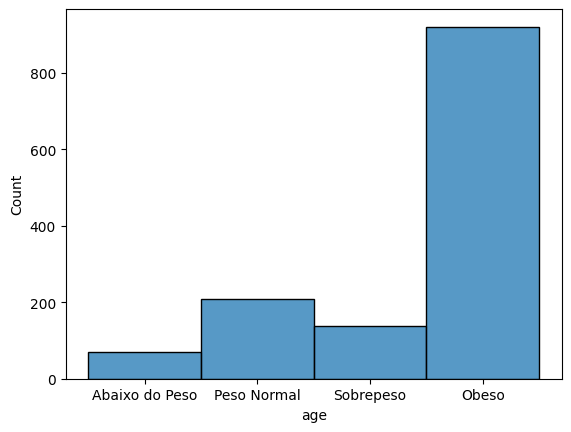

In [262]:
sea.histplot(pd.cut(data['age'],bins=[0, 18.5, 24.9, 29.9, 100], labels = ['Abaixo do Peso', 'Peso Normal', 'Sobrepeso', 'Obeso']))
plt.show()

In [263]:
genderCharges = data.loc[( data['children']==0 ) & (data['smoker'] == 'no')
                         ].groupby(by=['sex','region'])['charges'].mean().reset_index()

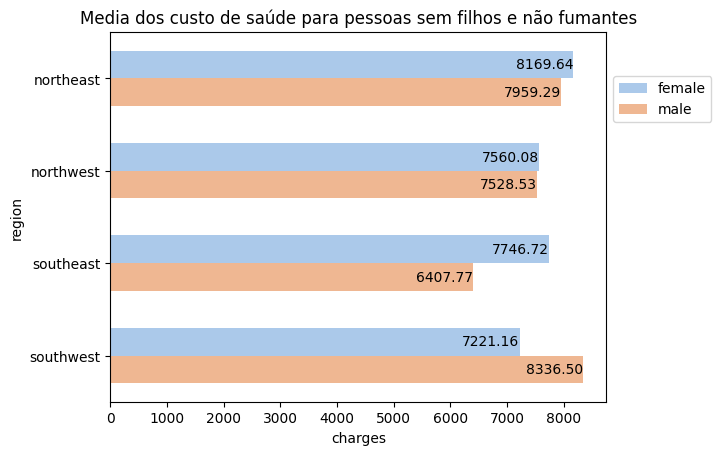

In [264]:
bar = sea.barplot(x = genderCharges['charges'] ,y=genderCharges['region'] , hue = genderCharges['sex'], width=0.6  ,palette='pastel')
for p in bar.patches: 
    if p.get_width() != 0:
        bar.annotate("%.2f"%p.get_width(), xy = (p.get_width(), p.get_y()+p.get_height()/2),xytext    = (0, 0), textcoords= 'offset points', ha = 'right', va = "center")
plt.title('Media dos custo de saúde para pessoas sem filhos e não fumantes')
plt.legend(bbox_to_anchor=(1,0.9,0,0))
plt.show()

In [265]:
line = data.loc[(data['bmi']>=18.5) & (data['bmi'] <= 25) & (data['smoker'] =='no') ].groupby( by = ['sex','children'])[['charges']].mean().apply(lambda x:round(x,1)).reset_index()

/tmp/ipykernel_15472/1800722575.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(v[1][1], v[1][2], f'{v[1][2]}')


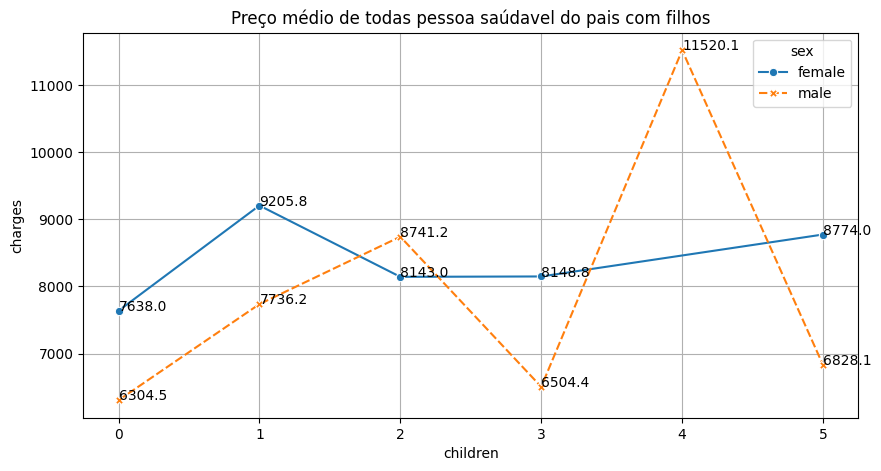

In [266]:

plt.figure(figsize=(10,5))
sea.lineplot(x=line['children'],y=line['charges'],hue=line['sex'],style=line['sex'],markers=True)
plt.grid(True)
plt.title('Preço médio de todas pessoa saúdavel do pais com filhos')
for v in line.iterrows():
    plt.text(v[1][1], v[1][2], f'{v[1][2]}')
plt.show()

In [267]:
line = data.loc[(data['bmi']>=29) & (data['bmi'] <= 34.99) & (data['smoker'] =='no')].groupby( by = ['sex','children'])[['charges']].mean().apply(lambda x:round(x,1)).reset_index()

/tmp/ipykernel_15472/3160420813.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(v[1][1], v[1][2], f'{v[1][2]}')


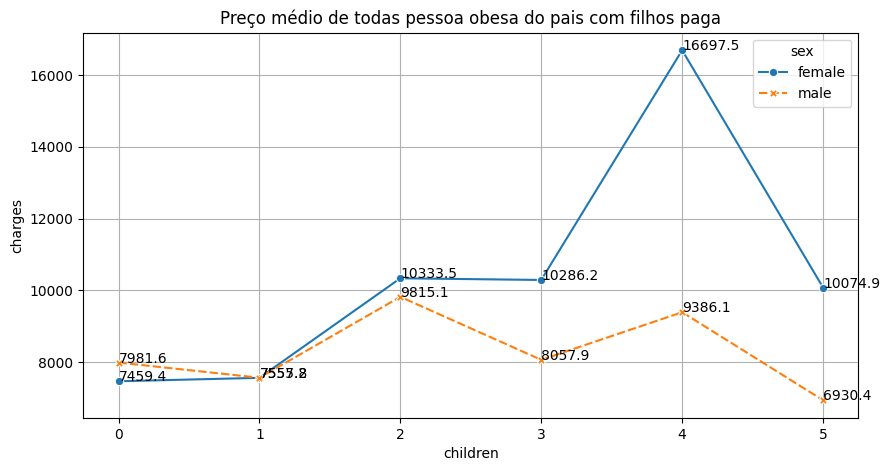

In [268]:
plt.figure(figsize=(10,5))
sea.lineplot(x=line['children'],y=line['charges'],hue=line['sex'],style=line['sex'],markers=True)
plt.grid(True)
plt.title('Preço médio de todas pessoa obesa do pais com filhos paga')
for v in line.iterrows():
    plt.text(v[1][1], v[1][2], f'{v[1][2]}')
plt.xticks([0,1,2,3,4,5])
plt.show()

In [269]:
line = data.loc[(data['bmi']>=29) & (data['bmi'] <= 34.99) & (data['smoker'] =='yes')].groupby( by = ['sex','children'])[['charges']].mean().apply(lambda x:round(x,1)).reset_index()

/tmp/ipykernel_15472/946678746.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(v[1][1], v[1][2], f'{v[1][2]}')


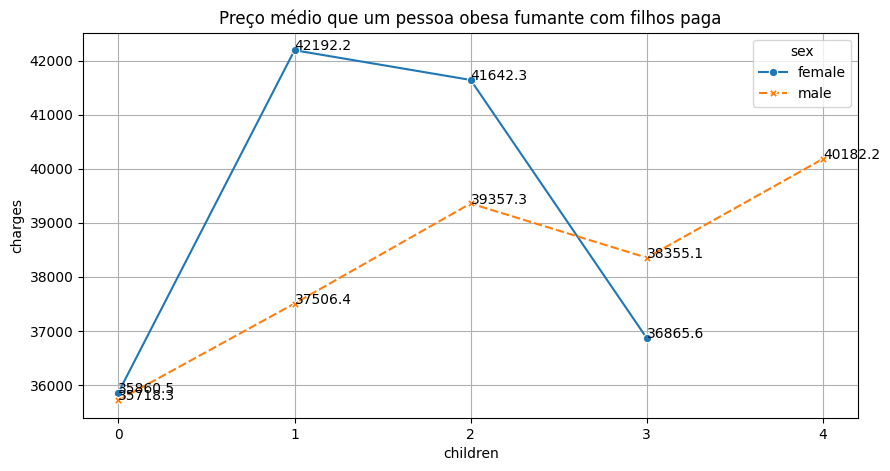

In [270]:
plt.figure(figsize=(10,5))
sea.lineplot(x=line['children'],y=line['charges'],hue=line['sex'],style=line['sex'],markers=True)
plt.grid(True)
plt.xticks([0,1,2,3,4])
plt.title('Preço médio que um pessoa obesa fumante com filhos paga')
for v in line.iterrows():
    plt.text(v[1][1], v[1][2], f'{v[1][2]}')
plt.show()

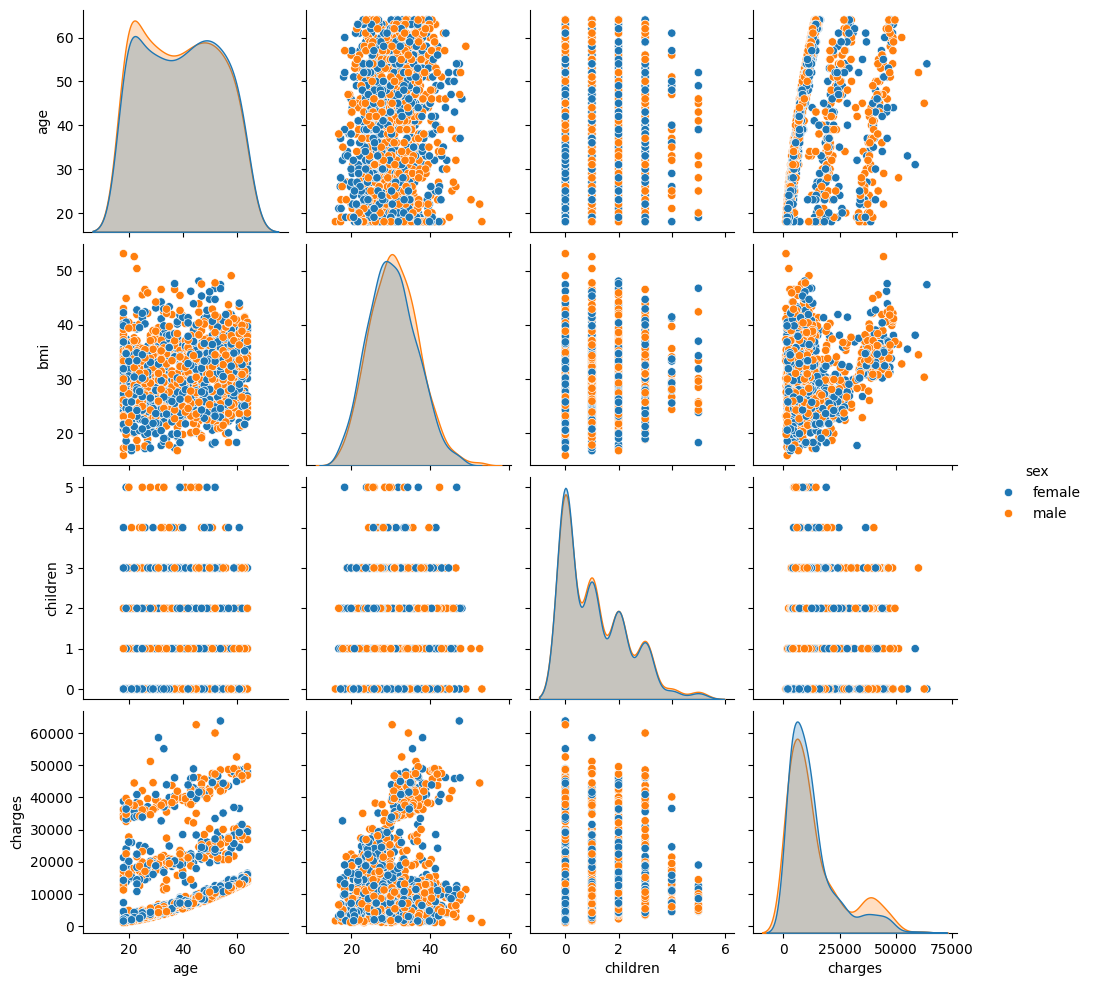

In [271]:
sea.pairplot(data,hue='sex')
plt.show()

&nbsp;

# Regressão

In [272]:
from sklearn.preprocessing import StandardScaler ,LabelBinarizer
from sklearn.metrics       import *
from sklearn.linear_model  import LinearRegression
from sklearn.tree          import DecisionTreeRegressor
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

## Preprocessamento

#### Tratamento do dados

In [273]:
data = pd.get_dummies(data,columns=['region'])

In [274]:
data['sex']    = LabelBinarizer().fit_transform(data['sex'])
data['smoker'] = LabelBinarizer().fit_transform(data['smoker'])

In [275]:
data.corrwith(data['charges'])

age                 0.299008
sex                 0.057292
bmi                 0.198341
children            0.067998
smoker              0.787251
charges             1.000000
region_northeast    0.006349
region_northwest   -0.039905
region_southeast    0.073982
region_southwest   -0.043210
dtype: float64

#### definindo modelo test e treinamento

In [276]:
X = StandardScaler().fit_transform(data.drop(columns=['charges']))
Y = data['charges']

In [277]:
xtrain ,xtest , ytrain , ytest = train_test_split(X,Y,test_size=0.25, random_state=42) 

### Regressão Linear

In [278]:
reg = LinearRegression()

In [279]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [280]:
pred = reg.predict(xtest)

In [281]:
mean_absolute_error(ytest,pred)

4243.654116653146

In [282]:
mean_squared_error(ytest,pred)

35117755.73613633

In [283]:
r2_score(ytest,pred)

0.7672642952734355

In [284]:
cross_val_score(reg,X,Y,scoring='r2',cv=10)

array([0.78688092, 0.73250013, 0.73470008, 0.66880787, 0.77298969,
       0.78394134, 0.79262477, 0.66871329, 0.7424225 , 0.76262096])

### Regressor Tree

In [285]:
X = data.drop(columns=['charges'])
Y = data['charges']

In [286]:
xtrain ,xtest , ytrain , ytest = train_test_split(X,Y,test_size=0.25, random_state=42)

In [287]:
treereg = DecisionTreeRegressor()

In [288]:
params = {
    'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_features': ['auto', 'sqrt', 'log2'],
}

In [289]:
grid = GridSearchCV(treereg,param_grid=params,scoring='r2')

In [290]:
grid.fit(xtrain,ytrain)

/home/mateus/MEGA/Projetos/Machine-Leaning/venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
40 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/home/mateus/MEGA/Projetos/Machine-Leaning/venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/mateus/MEGA/Projetos/Machine-Leaning/venv/lib/python3.11/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/home/mateus/MEGA/Projetos/Machine-Leaning/venv/lib/python3.11/site-package

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='r2')

In [291]:
print(grid.best_estimator_)

DecisionTreeRegressor(criterion='friedman_mse', max_features='sqrt')


In [292]:
grid.best_score_

0.7074437248495589

In [305]:
tree = DecisionTreeRegressor(criterion='poisson', max_features='log2')

In [306]:
pred = tree.fit(xtrain,ytrain).predict(xtest)

In [307]:
r2_score(ytest,pred)

0.717361169485797